### SIR Model for Covid-19 using Python

by H. Knospe

In [1]:
import numpy as np
import scipy.integrate as sci
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import DateFormatter
from matplotlib.ticker import ScalarFormatter

In [2]:
# SIR model (simplified)
def SIR_model(y,t,beta,gamma):
    S, I, R = y
    
    dS_dt = - beta*S*I
    dI_dt = beta*S*I - gamma*I
    dR_dt = gamma*I
    
    return([dS_dt,dI_dt,dR_dt])

In [3]:
# Germany 23 July 2020
# Source: Robert-Koch Institute
N = 83517046 # Population Germany
It = 203386  # total infected
De = 9101 # total dead
Rc = 189000 # total recovered
I0 = It-De-Rc # currently infected
print("Currently Infected:", I0)
S0 = N-It # susceptible
R0 = Rc + De # removed = recovered + dead
gamma = 1/7 # 7 days infectious
# beta = R*gamma/N
R=1.05 # reproduction number, R=N*beta/gamma
# time steps
t = np.linspace(0,365,10000)

Currently Infected: 5285


In [4]:
solution = sci.odeint(SIR_model,[S0,I0,R0],t,args=(R*gamma/N,gamma))
solution = np.array(solution)

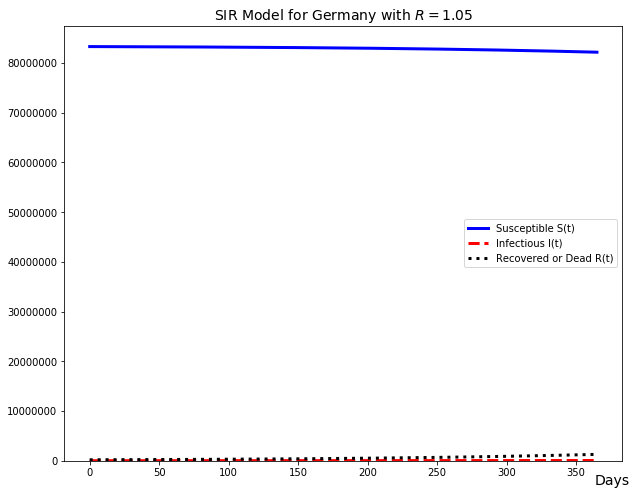

In [5]:
fig, ax = plt.subplots(figsize=(10, 8)) 

solution = sci.odeint(SIR_model,[S0,I0,R0],t,args=(R*gamma/N,gamma))
  
ax.plot(t,solution[:,0],label="Susceptible S(t)",color="blue",linewidth=3)
ax.plot(t,solution[:,1],label="Infectious I(t)",color="red",linewidth=3, linestyle="dashed")
ax.plot(t,solution[:,2],label="Recovered or Dead R(t)",color="black",linewidth=3, linestyle='dotted')
ax.set_title('SIR Model for Germany with $R=%1.2f$'% R, fontsize=14) #, position=(0.1,.5))
#ax.set_yscale('log')
ax.set_ylim(bottom=0)  
#ax.set_ylim(top=25000000) 
ax.legend(loc='center right')   
ax.ticklabel_format(useOffset=False, style='plain')
ax.annotate('Days', xy=(0.95, -0.03), ha='left', va='top', xycoords='axes fraction', fontsize=14)
#plt.title("SIR Model for Germany")
plt.show()

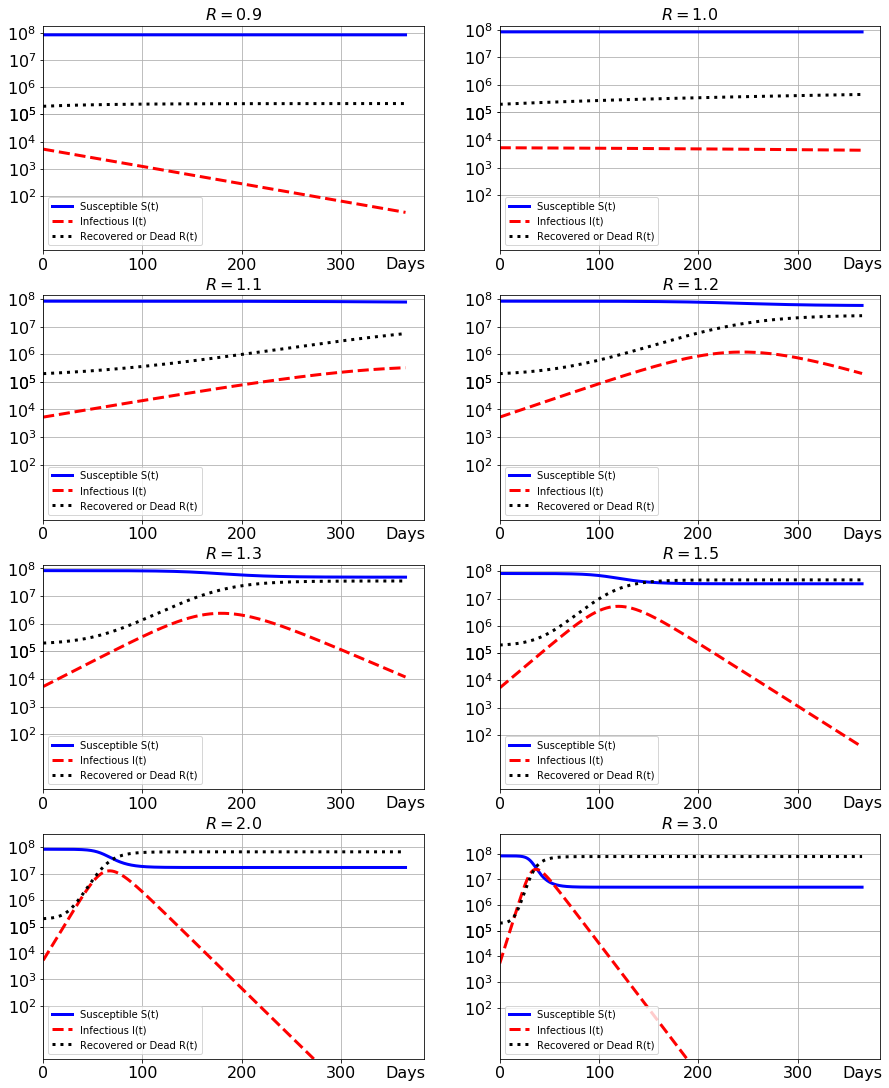

In [6]:
fig, ax = plt.subplots(4,2,figsize=(15, 19)) #, sharex=True, sharey=True)
i=0
for R in [0.9,1,1.1,1.2,1.3,1.5,2,3]:
    solution = sci.odeint(SIR_model,[S0,I0,R0],t,args=(R*gamma/N,gamma))
    #fig, ax = plt.subplots(figsize=(7, 5)) 
    ax[i//2,i%2].plot(t,solution[:,0],label="Susceptible S(t)",color="blue",linewidth=3)
    ax[i//2,i%2].plot(t,solution[:,1],label="Infectious I(t)",color="red",linewidth=3, linestyle="dashed")
    ax[i//2,i%2].plot(t,solution[:,2],label="Recovered or Dead R(t)",color="black",linewidth=3,linestyle="dotted")
    ax[i//2,i%2].set_title('$R=%1.1f$'% R, fontsize=16) #, position=(0.1,.5))
    ax[i//2,i%2].set_yscale('log')
    #ax[i//2,i%2].yaxis.set_major_formatter(ScalarFormatter())
    ax[i//2,i%2].tick_params(labelsize=16)
    ax[i//2,i%2].set_ylim(bottom=1)
    ax[i//2,i%2].set_yticks([100,1000,10000,100000,100000,1000000,10000000,100000000])
    ax[i//2,i%2].set_xlim(0)
    ax[i//2,i%2].annotate('Days', xy=(0.9, -0.03), ha='left', va='top', xycoords='axes fraction', fontsize=16)
    ax[i//2,i%2].tick_params(axis='y', which='minor')
    #ax[i//2,i%2].set_ylim(top=10000000)  
    ax[i//2,i%2].legend(loc='lower left')
    ax[i//2,i%2].grid()  
    i=i+1
#fig.suptitle("SIR Model for Germany", fontsize=14)    
plt.savefig("Germany-Covid-R.png",bbox_inches='tight',pad_inches=0.5,dpi=300)    
plt.show()